In [1]:
from google.colab import files
uploaded=files.upload()

Saving twitter_validation.csv to twitter_validation.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('twitter_validation.csv', encoding='utf-8')

# Display the first few rows and basic information
print(df.head())
print("\
Dataframe Info:")
print(df.info())

   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
2  CSGO matchmaking is so full of closet hacking,...        

In [5]:
import pandas as pd

# Load the data
df = pd.read_csv('twitter_validation.csv', encoding='utf-8', header=None)

# Assign proper column names
df.columns = ['ID', 'Topic', 'Sentiment', 'Text']

# Display the first few rows and basic information
print(df.head())
print("\
Dataframe Info:")
print(df.info())

# Check for any missing values
print("\
Missing Values:")
print(df.isnull().sum())

# Display sentiment distribution
print("\
Sentiment Distribution:")
print(df['Sentiment'].value_counts(normalize=True) * 100)

# Save the cleaned dataset
df.to_csv('cleaned_twitter_data.csv', index=False)
print("\
Cleaned data saved to 'cleaned_twitter_data.csv'")

     ID      Topic   Sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                Text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...  
Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1000 non-null   int64 
 1   Topic      1000 non-null   object
 2   Sentiment  1000 non-null   object
 3   Text       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
None
Missing Values:
ID           0
Topic        0
Sentimen

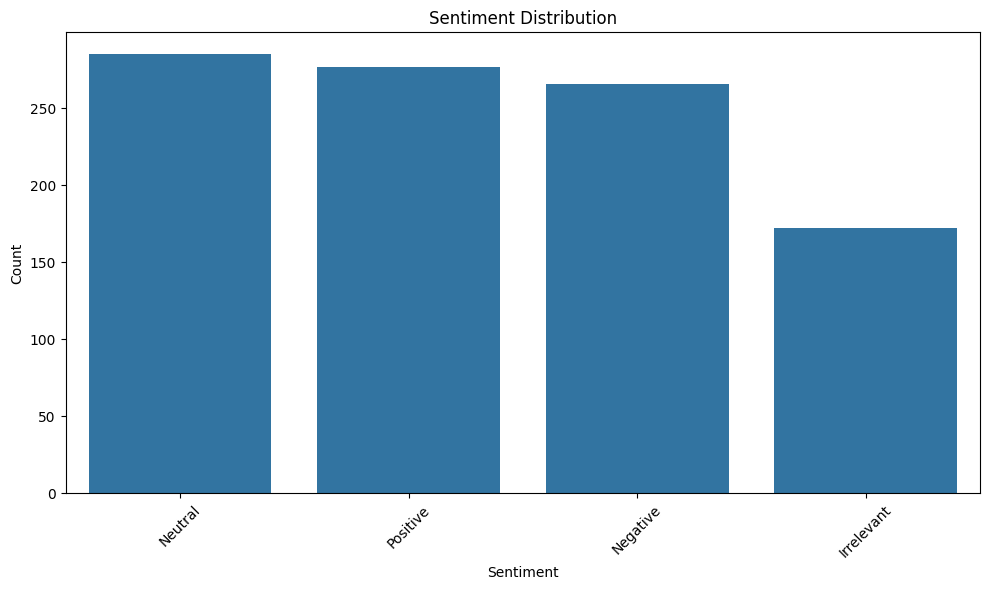

Topic
RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Name: count, dtype: int64
Sentiment                          Irrelevant  Negative  Neutral  Positive
Topic                                                                     
Amazon                                      3         6       18         7
ApexLegends                                 3         6       17        10
AssassinsCreed                              1         4        4        24
Battlefield                                12         7        4         3
Borderlands                                 2         5       12        14
CS-GO                                      

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the most common topics
common_topics = df['Topic'].value_counts().head(10)

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sentiment_distribution.png')
plt.show()

# Investigate the relationship between topics and sentiments
relationship = df.groupby(['Topic', 'Sentiment']).size().unstack(fill_value=0)

# Save the relationship data to a CSV file
relationship.to_csv('topic_sentiment_relationship.csv')

# Display the most common topics and the relationship
print(common_topics)
print(relationship)